## Affinity chromatography (e.g., IMAC, IEX)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### IMAC

In [2]:
df = pd.read_csv('IMAC.csv', delimiter='\t',encoding = "UTF-16", header=2)
df.columns

Index(['ml', 'mAU', 'ml.1', '%B', 'ml.2', 'Fraction', 'ml.3', 'mAU.1'], dtype='object')

Text(102, 94, 'P2')

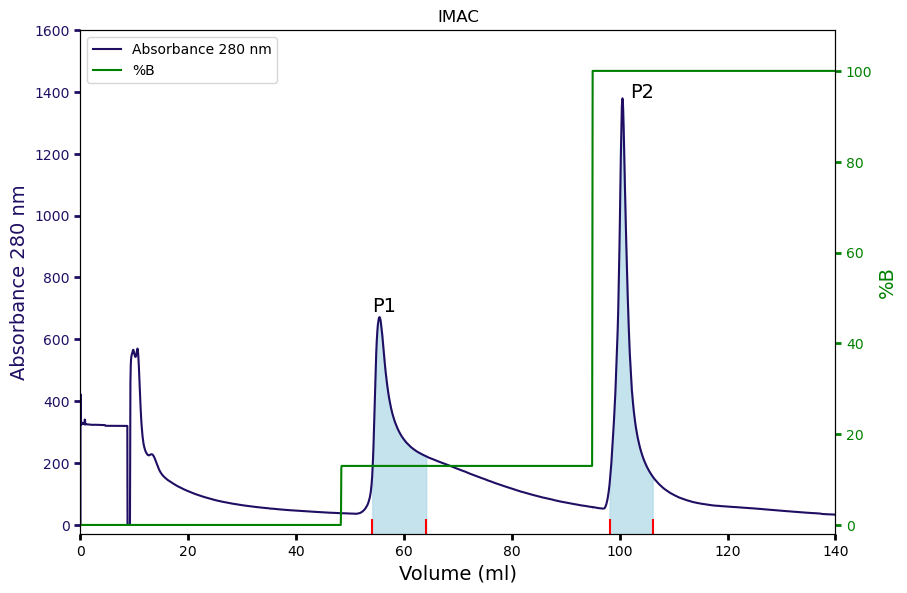

In [3]:
fig, ax = plt.subplots()
fig.subplots_adjust(right=0.88, top=0.95)
fig.set_size_inches(10,6)
twin1 = ax.twinx()
twin1.set_ylim(-2, 109)


p1, = ax.plot(df['ml'], df['mAU'], "#200e63", label="Absorbance 280 nm")
p2, = twin1.plot(df['ml.1'], df['%B'], "g-", label="%B")

ax.set_xlim(0, 140) # Comment this line for auto adjust of x axis, then adjust as needed
ax.set_ylim(-30, 1600) # Comment this line for auto adjust of y axis, then adjust as needed

### delimit region for fraction collection
regions = [(54.11, 64.11), (98.11,  106.11)] # List of (start, end) tuples for regions to highlight
for start, end in regions:
    ax.vlines([start, end], -100, 20, colors='red')

# Fill areas under the curve for specified regions
for start, end in regions:
    mask = (df['ml'] >= start) & (df['ml'] <= end)
    ax.fill_between(df['ml'], df['mAU'], where=mask, color='lightblue', y2= -50, alpha=0.7)
      
ax.set_xlabel("Volume (ml)", fontsize=14)
ax.set_ylabel("Absorbance 280 nm", fontsize=14)
twin1.set_ylabel("%B", fontsize=14)

ax.yaxis.label.set_color(p1.get_color())
twin1.yaxis.label.set_color(p2.get_color())
tkw = dict(size=4, width=2)
ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
twin1.tick_params(axis='y', colors=p2.get_color(), **tkw)

ax.tick_params(axis='x', **tkw)

ax.legend(handles=[p1, p2], loc="upper left")
ax.set_title('IMAC')

# Add text annotations for peaks
twin1.text(54, 47, 'P1', fontsize=14)
twin1.text(102, 94, 'P2', fontsize=14)

#plt.savefig('IMAC.svg')

### IEX

In [4]:
df = pd.read_csv('IEX.csv', delimiter='\t',encoding = "UTF-16", header=2)
df.columns

Index(['ml', 'mAU', 'ml.1', 'mS/cm', 'ml.2', '%B', 'ml.3', 'Injection', 'ml.4',
       'Fraction', 'ml.5', 'mAU.1'],
      dtype='object')

Text(0.5, 1.0, 'IEX')

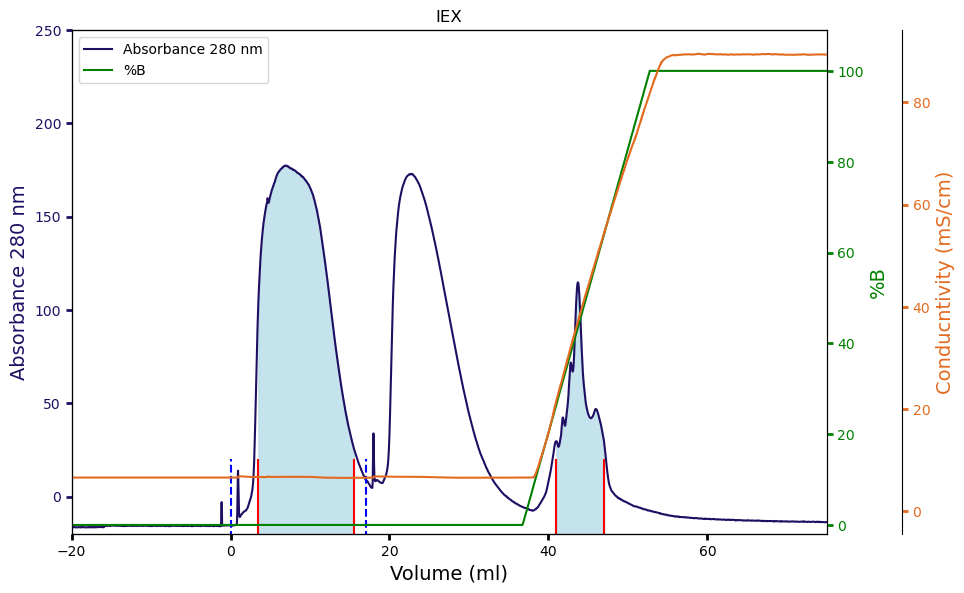

In [13]:
fig, ax = plt.subplots()
fig.subplots_adjust(right=0.88, top=0.95)
fig.set_size_inches(10,6)
twin1 = ax.twinx()
twin2 = ax.twinx()
twin2.spines["right"].set_position(("axes", 1.1))
twin1.set_ylim(-2, 109)

p1, = ax.plot(df['ml'], df['mAU'], "#200e63", label="Absorbance 280 nm")
p2, = twin1.plot(df['ml.2'], df['%B'], "g-", label="%B")
p3, = twin2.plot(df['ml.1'], df['mS/cm'], "#e36b20", label="Conductivity (mS/cm)")

ax.set_xlim(-20, 75) # Comment this line for auto adjust of x axis, then adjust as needed
ax.set_ylim(-20, 250) # Comment this line for auto adjust of y axis, then adjust as needed

### delimit region for fraction collection
regions = [(3.5, 15.5), (41,  47)] # List of (start, end) tuples for regions to highlight
for start, end in regions:
    ax.vlines([start, end], -100, 20, colors='red')

## Add marker for injections
ax.vlines((0, 17.03), -100, 20, colors='blue', linestyles='dashed')

# Fill areas under the curve for specified regions
for start, end in regions:
    mask = (df['ml'] >= start) & (df['ml'] <= end)
    ax.fill_between(df['ml'], df['mAU'], where=mask, color='lightblue', y2= -50, alpha=0.7)
      
ax.set_xlabel("Volume (ml)", fontsize=14)
ax.set_ylabel("Absorbance 280 nm", fontsize=14)
twin1.set_ylabel("%B", fontsize=14)
twin2.set_ylabel("Conducntivity (mS/cm)", fontsize=14)

ax.yaxis.label.set_color(p1.get_color())
twin1.yaxis.label.set_color(p2.get_color())
twin2.yaxis.label.set_color(p3.get_color())
tkw = dict(size=4, width=2)
ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
twin1.tick_params(axis='y', colors=p2.get_color(), **tkw)
twin2.tick_params(axis='y', colors=p3.get_color(), **tkw)

ax.tick_params(axis='x', **tkw)

ax.legend(handles=[p1, p2], loc="upper left")
ax.set_title('IEX')

#plt.savefig('IEX.svg')